In [1]:
# Installation
!pip install scanpy
!pip install anndata
!pip3 install igraph
!pip install celltypist
!pip install decoupler
!pip install fa2-modified

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 89.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [2]:
# Import libraries
# Core single-cell tools
import scanpy as sc
import anndata as ad
# For cell annotation step
import decoupler as dc
# For table manipulations and vizualisation
import pandas as pd
import seaborn as sns

In [3]:
# Upload the data
!wget https://github.com/josoga2/sc/raw/refs/heads/main/bone_marrow.h5ad
BM_adata = sc.read_h5ad('bone_marrow.h5ad')
print (BM_adata)

--2025-11-29 18:28:37--  https://github.com/josoga2/sc/raw/refs/heads/main/bone_marrow.h5ad
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad [following]
--2025-11-29 18:28:37--  https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 354509549 (338M) [application/octet-stream]
Saving to: ‘bone_marrow.h5ad’

bone_marrow.h5ad    100%[===================>] 338.09M  23.4MB/s    in 15s     

2025-11-29 18:28:53 (23.0 MB/s) - ‘bone_marrow.h5ad’ saved [354509549/354

In [4]:
# The dimensions of the dataset
BM_adata.shape

(14783, 17374)

In [5]:
# The first 5 rows describing the genes in the dataset
BM_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding


In [6]:
# The first 5 rows describing the cells (ID) in the dataset
BM_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,is_primary_data,suspension_type,tissue_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,2P)e%zgsv_
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,78-year-old stage,Lv&N1yD6*0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,DZ>`^5OH2o
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,J4$QmqEgvX
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,Y&7u#&E`-T


In [7]:
# Both gene and cell datasets in a proper dataframe format
BM_adata.to_df()

,ENSG00000161920,ENSG00000122335,ENSG00000175548,ENSG00000100330,ENSG00000176340,ENSG00000179846,ENSG00000204860,ENSG00000172260,ENSG00000141424,ENSG00000164512,...,ENSG00000164114,ENSG00000151702,ENSG00000224578,ENSG00000138756,ENSG00000111052,ENSG00000176946,ENSG00000150456,ENSG00000284934,ENSG00000261842,ENSG00000260456
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.0,0.000000,0.0,0.0,9.436466,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,8.817776,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,0.0,8.651494,0.0,0.0,8.651494,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,0.0,0.000000,0.0,0.0,8.858533,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guo-TTTGTCAGTTTCGCTC-4,0.0,0.000000,0.0,0.0,8.389465,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGAGACG-7,0.0,0.000000,0.0,0.0,9.931639,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-TTTGTCATCAGATAAG-4,0.0,0.000000,0.0,0.0,10.009642,0.0,0.0,0.0,0.000000,0.0,...,0.0,9.01104,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# QUALITY CONTROL (QC)

In [9]:
# Step to leave only unique cells and genes
BM_adata.var_names_make_unique()
BM_adata.obs_names_make_unique()

In [10]:
# Search of contamination from dying cells (MT, mitochondrial genes), ribosomal transcripts (RIBO) or hemoglobin (HB).
# The thresholds are: (MT < 5%, RB < 10%, and HB < 5%).
BM_adata.var['MT'] = BM_adata.var['feature_name'].str.startswith("MT-")
BM_adata.var['RIBO'] = BM_adata.var['feature_name'].str.startswith("RPS", "RPL")
BM_adata.var['HB'] = BM_adata.var['feature_name'].str.startswith("^HB[^(P)]")

In [11]:
# Check results for dying cells.
mt_genes = BM_adata.var[BM_adata.var['MT']]
mt_genes

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB
ENSG00000228253,2270,False,MT-ATP8,NCBITaxon:9606,gene,207,protein_coding,True,False,False
ENSG00000198899,15626,False,MT-ATP6,NCBITaxon:9606,gene,681,protein_coding,True,False,False
ENSG00000198763,15561,False,MT-ND2,NCBITaxon:9606,gene,1042,protein_coding,True,False,False
ENSG00000198886,15656,False,MT-ND4,NCBITaxon:9606,gene,1378,protein_coding,True,False,False
ENSG00000198804,15656,False,MT-CO1,NCBITaxon:9606,gene,1542,protein_coding,True,False,False
ENSG00000198695,4611,False,MT-ND6,NCBITaxon:9606,gene,525,protein_coding,True,False,False
ENSG00000212907,6575,False,MT-ND4L,NCBITaxon:9606,gene,297,protein_coding,True,False,False
ENSG00000198888,14520,False,MT-ND1,NCBITaxon:9606,gene,956,protein_coding,True,False,False
ENSG00000198712,15669,False,MT-CO2,NCBITaxon:9606,gene,684,protein_coding,True,False,False
ENSG00000198727,15393,False,MT-CYB,NCBITaxon:9606,gene,1141,protein_coding,True,False,False


In [12]:
# Check results for ribosomal transcripts.
ribo_genes = BM_adata.var[BM_adata.var['RIBO']]
ribo_genes

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB
ENSG00000117676,2019,False,RPS6KA1,NCBITaxon:9606,gene,586,protein_coding,False,True,False
ENSG00000118181,14810,False,RPS25,NCBITaxon:9606,gene,609,protein_coding,False,True,False
ENSG00000198208,67,False,RPS6KL1,NCBITaxon:9606,gene,1436,protein_coding,False,True,False
ENSG00000136643,310,False,RPS6KC1,NCBITaxon:9606,gene,4188,protein_coding,False,True,False
ENSG00000145425,14792,False,RPS3A,NCBITaxon:9606,gene,680,protein_coding,False,True,False
ENSG00000138326,14982,False,RPS24,NCBITaxon:9606,gene,645,protein_coding,False,True,False
ENSG00000170889,14838,False,RPS9,NCBITaxon:9606,gene,772,protein_coding,False,True,False
ENSG00000255949,12,False,RPS6KB2-AS1,NCBITaxon:9606,gene,470,lncRNA,False,True,False
ENSG00000149273,15238,False,RPS3,NCBITaxon:9606,gene,754,protein_coding,False,True,False
ENSG00000177954,15382,False,RPS27,NCBITaxon:9606,gene,496,protein_coding,False,True,False


In [13]:
# Check results for hemoglobin. No hemoglobin genes found.
hb_genes = BM_adata.var[BM_adata.var['HB']]
hb_genes

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB


In [14]:
# Calculate the QC metrics
sc.pp.calculate_qc_metrics(
    BM_adata, qc_vars=["MT", 'RIBO', 'HB'], inplace=True, log1p=True
)

In [15]:
# QC metric assessment.

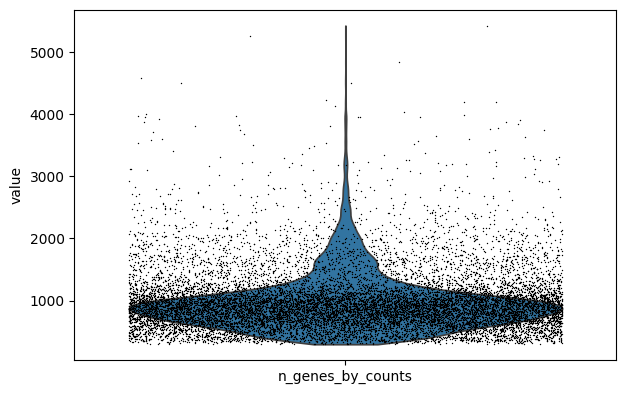

In [16]:
# Violin plot visualization of the number of genes expressed in each cell.
sc.pl.violin(
    BM_adata,
    ["n_genes_by_counts"],
    jitter=0.4,
    multi_panel=False,
)

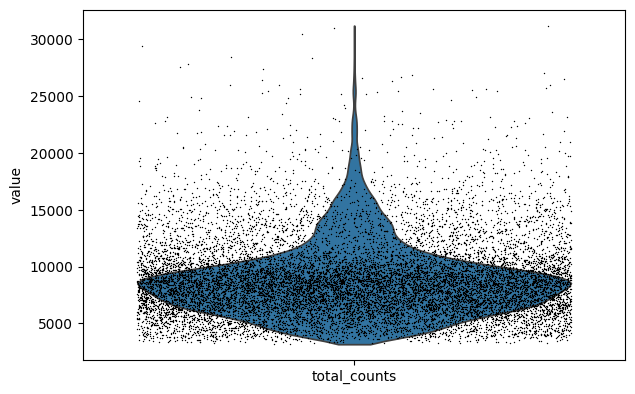

In [17]:
# Violin plot for the total number of molecules (UMI) detected in a cell.
sc.pl.violin(
    BM_adata,
    ["total_counts"],
    jitter=0.4,
    multi_panel=False,
)

In [18]:
# QC metrics included in the headers of obs (cell dataset)
BM_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,total_counts_RIBO,log1p_total_counts_RIBO,pct_counts_RIBO,total_counts_HB,log1p_total_counts_HB,pct_counts_HB
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,40.537370,138.356339,4.937034,1.154665,357.311005,5.881402,2.981970,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,57.850376,113.859787,4.743712,1.350507,376.610626,5.933864,4.467032,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,59.749640,125.068520,4.836825,1.543431,385.375214,5.956809,4.755794,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,56.156243,103.474380,4.648942,1.182754,388.487671,5.964832,4.440570,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,100.000121,138.531082,4.938287,2.870118,352.302429,5.867324,7.299080,0.0,0.0,0.0


In [19]:
# QC metrics included in the headers of var (gene dataset)
BM_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,RIBO,HB,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding,False,False,False,885,0.502831,0.407351,94.013394,7433.353516,8.913867
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding,False,False,False,405,0.231814,0.208488,97.260367,3426.911377,8.139707
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding,False,False,False,142,0.082084,0.078889,99.039437,1213.443970,7.102042
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding,False,False,False,404,0.227307,0.204822,97.267131,3360.278564,8.120077
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding,False,False,False,6898,4.277597,1.663471,53.338294,63235.750000,11.054641


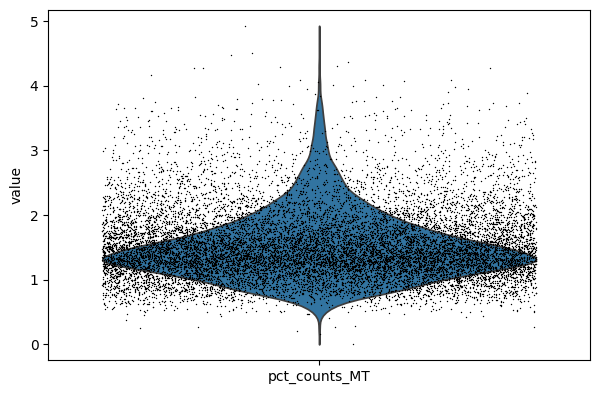

In [20]:
# Check the level of MT using visualization. MT < 2%.
sc.pl.violin(
    BM_adata,
    ["pct_counts_MT"],
    jitter=0.4,
    multi_panel=False,
)

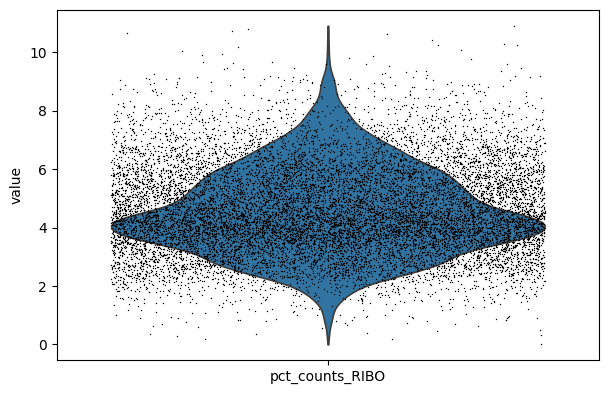

In [21]:
# Check the level of RIBO using visualization. RIBO < 5%.
sc.pl.violin(
    BM_adata,
    ["pct_counts_RIBO"],
    jitter=0.4,
    multi_panel=False,
)

In [22]:
# There is no filtering step here, because the percentage of mitochondrial and ribosomal genes is much lower than threshold (10%).

In [23]:
# Doublet detection
sc.pp.scrublet(BM_adata)

In [24]:
# NORMALIZATION

In [25]:
# Save a copy of the data
BM_adata.layers["counts"] = BM_adata.X.copy()

In [26]:
# Normalizing to median total counts
sc.pp.normalize_total(BM_adata)
# Logarithmize the data
sc.pp.log1p(BM_adata)

In [27]:
# Feature selection: selecting the top 1000 most variable genes
sc.pp.highly_variable_genes(BM_adata, n_top_genes=1000)

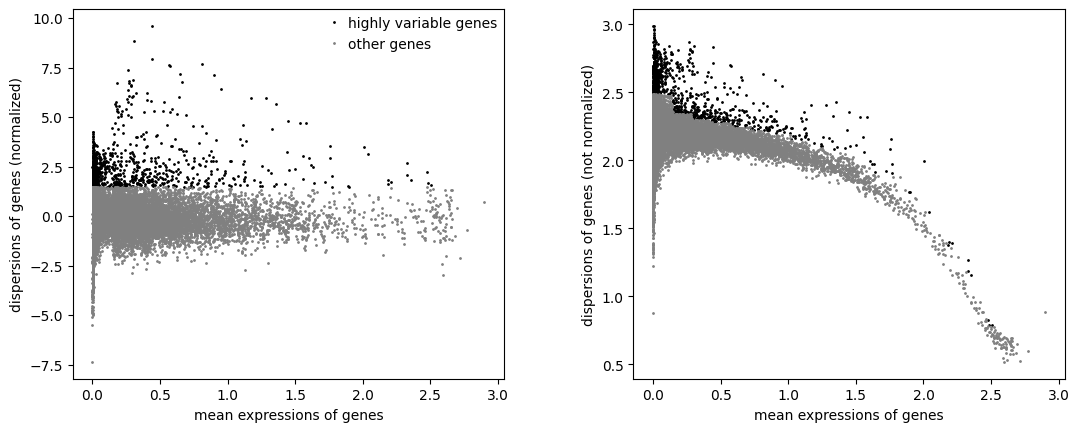

In [28]:
# Visualization of the normalisation results: after (left) and before (right) normalization
sc.pl.highly_variable_genes(BM_adata )
#left is normalized
#right is not

In [29]:
# DIMENTIONALITY REDUCTION & CLUSTERING

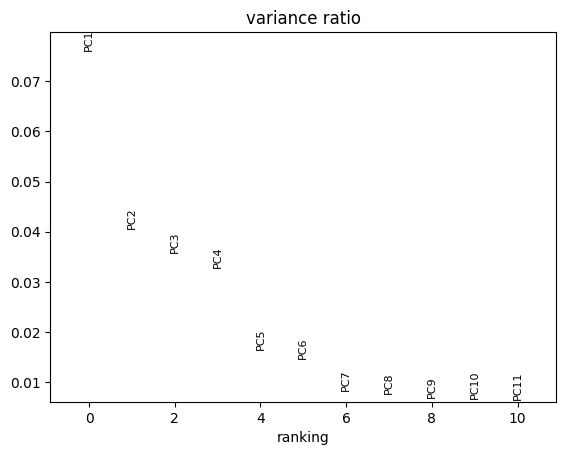

In [30]:
# Performing PCA analysis and visualization of the principal components.
sc.tl.pca(BM_adata)
sc.pl.pca_variance_ratio(BM_adata, n_pcs=10, log=False)

In [31]:
# Calculate proximity of the data points between each other for further umap dimensionality reduction.
sc.pp.neighbors(BM_adata)
sc.tl.umap(BM_adata)

In [32]:
# Graph-based clustering using leiden algorithm.
sc.tl.leiden(BM_adata, flavor="igraph", n_iterations=2)

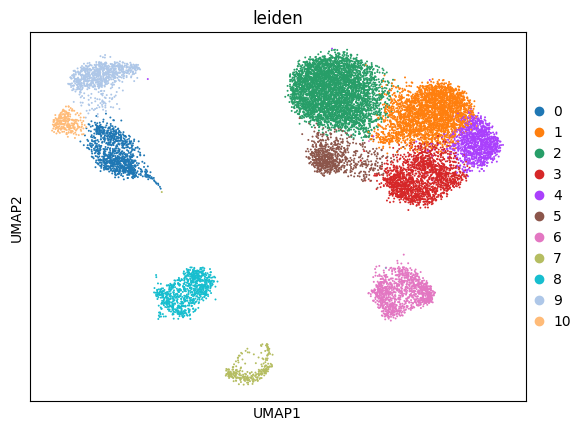

In [33]:
# Visualization of the leiden clustering.
sc.pl.umap(
    BM_adata,
    color=["leiden"],
    size=8,
)

In [34]:
# Resolution adjustment for Leiden clustering.
sc.tl.leiden(BM_adata, flavor="igraph", n_iterations=2, key_added="leiden_res0_3", resolution=0.3)

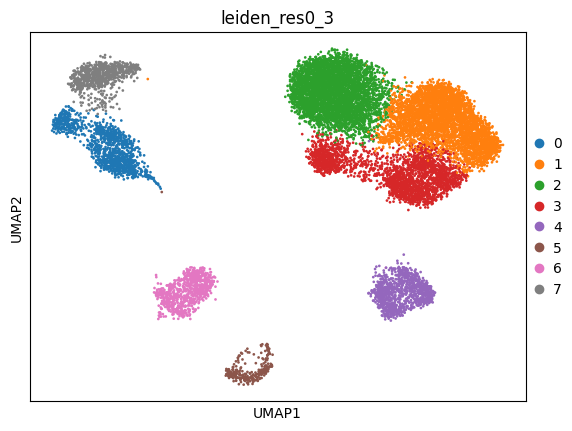

In [35]:
# Visualization of the clustering with chosen resolution.
sc.pl.umap(
    BM_adata,
    color=["leiden_res0_3"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1
)

In [36]:
# PREPARATION FOR THE CELL ANNOTATION AND CLUSTER ANNOTATION (step needed to translate Ensemble IDs to gene names for decoupler tool proper functioning)

In [37]:
# The dataset should be prepared for the cell cluster annotation part, specifically for the decoupler treatment.
# Ensemble IDs should be turned into gene names for decoupler could intake them.

In [38]:
# Download the table of genes from Ensemble website.
!wget wget -O result.txt 'http://www.ensembl.org/biomart/martservice?query=<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE Query><Query  virtualSchemaName = "default" formatter = "CSV" header = "0" uniqueRows = "0" count = "" datasetConfigVersion = "0.6" ><Dataset name = "hsapiens_gene_ensembl" interface = "default" ><Attribute name = "ensembl_gene_id" /><Attribute name = "external_gene_name" /></Dataset></Query>'

--2025-11-29 18:34:21--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2025-11-29 18:34:21--  http://www.ensembl.org/biomart/martservice?query=%3C?xml%20version=%221.0%22%20encoding=%22UTF-8%22?%3E%3C!DOCTYPE%20Query%3E%3CQuery%20%20virtualSchemaName%20=%20%22default%22%20formatter%20=%20%22CSV%22%20header%20=%20%220%22%20uniqueRows%20=%20%220%22%20count%20=%20%22%22%20datasetConfigVersion%20=%20%220.6%22%20%3E%3CDataset%20name%20=%20%22hsapiens_gene_ensembl%22%20interface%20=%20%22default%22%20%3E%3CAttribute%20name%20=%20%22ensembl_gene_id%22%20/%3E%3CAttribute%20name%20=%20%22external_gene_name%22%20/%3E%3C/Dataset%3E%3C/Query%3E
Resolving www.ensembl.org (www.ensembl.org)... 193.62.193.83
Connecting to www.ensembl.org (www.ensembl.org)|193.62.193.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘result.txt’

result.txt              [        <=>    

In [39]:
# Rename columns of Ensemble table and check the table view.
import pandas as pd
ensembl_var = pd.read_csv('/content/result.txt', header = None)
ensembl_var.columns = ['ensembl_gene_id', 'gene_name']
ensembl_var.head(3)

,ensembl_gene_id,gene_name
0,ENSG00000210049,MT-TF
1,ENSG00000211459,MT-RNR1
2,ENSG00000210077,MT-TV


In [40]:
# Query Omnipath and get PanglaoDB
markers_0 = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
markers_0 = markers_0[markers_0["canonical_marker"]]

# Remove duplicated entries
markers_0 = markers_0[~markers_0.duplicated(["cell_type", "genesymbol"])]

#Format because dc only accepts cell_type and genesymbol

markers_0 = markers_0.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers_0 = markers_0[["source", "target"]]

markers_0.head()

,source,target
,,
2,Bergmann glia,A2M
4,Mast cells,A4GALT
5,Embryonic stem cells,A7KBS4
8,Pinealocytes,AANAT
9,Astrocytes,AANAT


In [41]:
# Correct target to ensemble
markers = markers_0.merge(ensembl_var, left_on="target", right_on="gene_name", how="left")
markers = markers.drop(columns=["target"])
# Remove duplicated entries
markers = markers[~markers.duplicated(["source", "ensembl_gene_id"])]
#Format because dc only accepts cell_type and genesymbol
markers = markers.rename(columns={"source": "source", "ensembl_gene_id": "target"})

markers = markers[["source", "target"]]
markers = markers.dropna()

markers.head()

,source,target
0,Bergmann glia,ENSG00000175899
1,Mast cells,ENSG00000128274
3,Pinealocytes,ENSG00000129673
4,Astrocytes,ENSG00000129673
5,Sertoli cells,ENSG00000205002


In [42]:
# Load the gene expression matrix into dc
dc.mt.ulm(data=BM_adata,
          net=markers,
          tmin = 3)

In [43]:
# Retrieve the score for each cell type
score = dc.pp.get_obsm(BM_adata, key="score_ulm")
score

AnnData object with n_obs × n_vars = 14783 × 126
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', '

In [44]:
# Preview the data
BM_adata.obsm["score_ulm"].head()

,Acinar cells,Adipocytes,Adrenergic neurons,Airway goblet cells,Alpha cells,Alveolar macrophages,Astrocytes,B cells,B cells memory,B cells naive,...,T follicular helper cells,T helper cells,T memory cells,T regulatory cells,Tanycytes,Taste receptor cells,Thymocytes,Trophoblast cells,Tuft cells,Urothelial cells
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.883366,0.016440,-0.592726,-0.662709,0.835840,0.855729,0.297566,1.485696,-0.306571,0.237990,...,-0.513300,-0.422886,1.642851,-0.004406,0.544296,0.413771,-0.543441,-0.513300,3.113940,-0.784177
Guo-AAACCTGAGAGGTTGC-7,-0.906417,-1.284214,-0.467915,-0.523161,1.583154,1.219329,0.157764,0.487843,-0.624417,1.770228,...,-0.405214,3.168090,-0.405214,0.462934,0.897830,0.897830,3.848090,-0.405214,-0.202421,-0.619050
Guo-AAACCTGAGATACACA-3,-0.892457,-0.682421,-0.460709,-0.515104,1.573294,1.187902,1.656056,3.930777,1.925992,2.500056,...,-0.398974,1.170355,2.442601,-0.798165,0.925009,-0.651620,1.906375,2.286422,0.851602,-0.609516
Guo-AAACCTGAGCGATTCT-1,-0.922276,-0.772815,-0.476102,-0.532314,0.269852,1.180849,0.774435,4.512301,1.123891,1.731658,...,-0.412304,0.081099,2.300032,-0.824834,-0.673392,-0.673392,0.929784,-0.412304,1.709482,-0.629881
Guo-AAACCTGAGTGAAGAG-3,-0.643675,-0.510286,-0.332284,-0.371516,-0.621831,1.977723,0.019345,1.642936,2.016226,2.030037,...,-0.287758,2.170472,3.344478,1.184859,-0.469977,-0.469977,-0.761742,-0.287758,1.787138,-0.439610


In [45]:
BM_adata.obsm["score_ulm"].columns

Index(['Acinar cells', 'Adipocytes', 'Adrenergic neurons',
       'Airway goblet cells', 'Alpha cells', 'Alveolar macrophages',
       'Astrocytes', 'B cells', 'B cells memory', 'B cells naive',
       ...
       'T follicular helper cells', 'T helper cells', 'T memory cells',
       'T regulatory cells', 'Tanycytes', 'Taste receptor cells', 'Thymocytes',
       'Trophoblast cells', 'Tuft cells', 'Urothelial cells'],
      dtype='object', length=126)

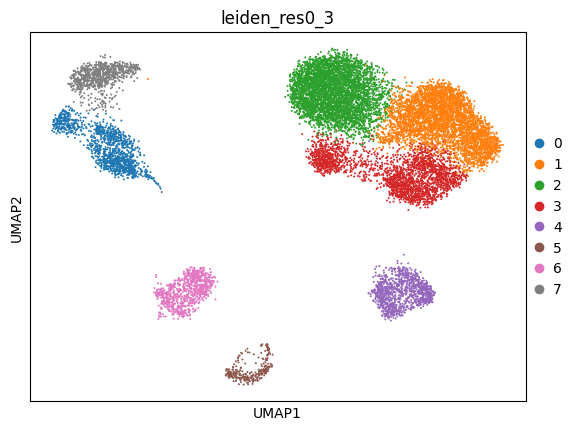

In [46]:
# Create the UMAP plot with resolution equal to 0.3.
score.obs['leiden_res0_3'] = BM_adata.obs['leiden_res0_3']
sc.pl.umap(score, color=["leiden_res0_3"], cmap="RdBu_r")

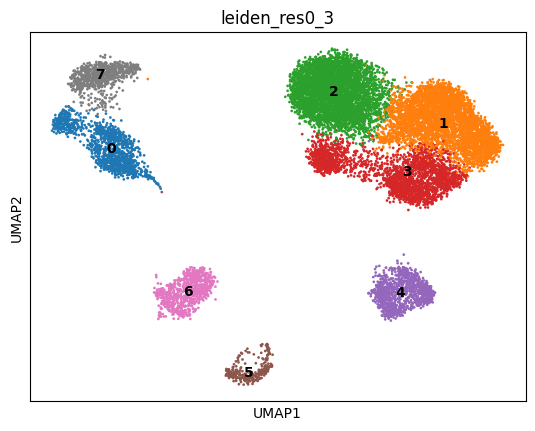

In [47]:
sc.pl.umap(
    BM_adata,
    color=["leiden_res0_3"],
    # increase horizontal space between panels
    wspace=0.5,
    size=15,
    ncols = 1,
    legend_loc="on data"
)

In [48]:
# Create object score and and copy clustering labels in it.
# Copy the leiden_res0_3 column from BM_adata.obs to score.obs
score.obs['leiden_res0_3'] = BM_adata.obs['leiden_res0_3']

# Rank genes
# Find differential abundance of cell types between clusters.
BM_adata_rank = dc.tl.rankby_group(score, groupby="leiden_res0_3", reference="rest", method="t-test_overestim_var")
# Filter the results of the differentially abundant cell types to only include cell types that have a positive test statistic.
BM_adata_rank = BM_adata_rank[BM_adata_rank["stat"] > 0]
# Show top rows of the result.
BM_adata_rank.head(10)

,group,reference,name,stat,meanchange,pval,padj
0,0,rest,Neutrophils,114.653687,6.386277,0.0,0.0
1,0,rest,Macrophages,88.443139,5.627834,0.0,0.0
2,0,rest,Dendritic cells,84.825821,5.375942,0.0,0.0
3,0,rest,Microglia,84.071634,4.280383,0.0,0.0
4,0,rest,Monocytes,80.642512,5.565005,0.0,0.0
5,0,rest,Kupffer cells,67.936813,2.514908,0.0,0.0
6,0,rest,Fibroblasts,55.806260,2.459996,0.0,0.0
7,0,rest,Acinar cells,54.602036,1.662374,0.0,0.0
8,0,rest,Adipocytes,54.139607,1.920271,0.0,0.0
9,0,rest,Satellite glial cells,53.719950,2.213568,0.0,0.0


In [49]:
# Create a mapping of the cluster annotation (labels).
cluster_annotations = BM_adata_rank[BM_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()

/tmp/ipython-input-4063696177.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_annotations = BM_adata_rank[BM_adata_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


In [50]:
cluster_annotations

{'0': 'Neutrophils',
 '1': 'Gamma delta T cells',
 '2': 'Nuocytes',
 '3': 'NK cells',
 '4': 'B cells naive',
 '5': 'Platelets',
 '6': 'Plasma cells',
 '7': 'Monocytes'}

In [51]:
# Leiden clustering using cell annotation output.
BM_adata.obs['cell_type'] = BM_adata.obs['leiden_res0_3'].map(cluster_annotations)

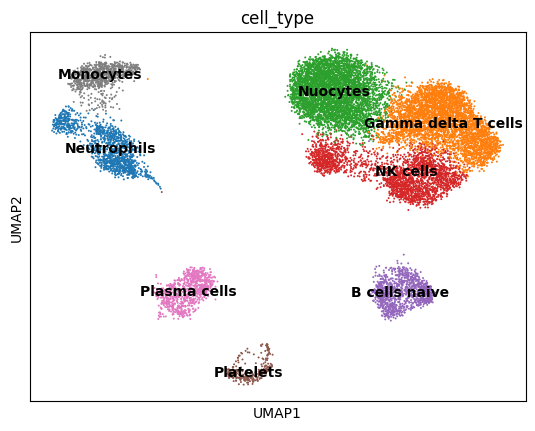

In [52]:
# UMAP 2D visualization of the clusters annotated by cell type.
sc.pl.umap(
    BM_adata,
    color=['cell_type'],
    legend_loc="on data"
)

In [53]:
# Gene names of the found cell clusters.
available_genes = set(BM_adata.var['feature_name'])

# Gamma delta T cells
gmtc_markers = markers_0[markers_0['source'].isin(['Gamma delta T cells'])]['target']
gmtc_markers = gmtc_markers[gmtc_markers.isin(available_genes)]
gmtc_markers = gmtc_markers.drop_duplicates()

# Nuocytes
nuo_markers = markers_0[markers_0['source'].isin(['Nuocytes'])]['target']
nuo_markers = nuo_markers[nuo_markers.isin(available_genes)]
nuo_markers = nuo_markers.drop_duplicates()

# NK cells
nk_cell_markers = markers_0[markers_0['source'].isin(['NK cells'])]['target']
nk_cell_markers = nk_cell_markers[nk_cell_markers.isin(available_genes)]
nk_cell_markers = nk_cell_markers.drop_duplicates()

# Neutrophils
neutro_markers = markers_0[markers_0['source'].isin(['Neutrophils'])]['target']
neutro_markers = neutro_markers[neutro_markers.isin(available_genes)]
neutro_markers = neutro_markers.drop_duplicates()

# Monocytes
mono_markers = markers_0[markers_0['source'].isin(['Monocytes'])]['target']
mono_markers = mono_markers[mono_markers.isin(available_genes)]
mono_markers = mono_markers.drop_duplicates()

# B cells naive
bcn_markers = markers_0[markers_0['source'].isin(['B cells naive'])]['target']
bcn_markers = bcn_markers[bcn_markers.isin(available_genes)]
bcn_markers = bcn_markers.drop_duplicates()

# Plasma cells
plasma_markers = markers_0[markers_0['source'].isin(['Plasma cells'])]['target']
plasma_markers = plasma_markers[plasma_markers.isin(available_genes)]
plasma_markers = plasma_markers.drop_duplicates()

# Platelets
plt_markers = markers_0[markers_0['source'].isin(['Platelets'])]['target']
plt_markers = plt_markers[plt_markers.isin(available_genes)]
plt_markers = plt_markers.drop_duplicates()

In [54]:
display(gmtc_markers)

,target
,
175,ADGRG1
549,ASPM
597,AURKB
693,BIRC5
951,CCL5
982,CCNB1
1096,CD247
1237,CD7
1394,CENPA


In [55]:
display(nuo_markers)

,target
,
483,ARG1
2885,GATA3
3513,ICOS
3723,IL7R


In [56]:
display(nk_cell_markers)

,target
,
247,AHR
944,CCL3
946,CCL4
953,CCL5
1069,CD2
...,...
7534,TGFB1
7955,TXK
8137,XCL1


In [57]:
display(neutro_markers)

,target
,
137,ADAM8
205,ADPGK
486,ARG2
553,ASPRV1
738,BST1
771,C5AR1
941,CCL3
986,CCR1
1028,CCRL2


In [58]:
display(mono_markers)

,target
,
60,ACE
80,ACP5
123,ADA2
167,ADGRE1
409,APOBEC3A
...,...
7225,SPN
7495,TET2
7610,TLR4


In [59]:
display(bcn_markers)

,target
,
20,ABCB4
131,ADAM28
629,BACH2
634,BANK1
668,BCL7A
673,BEND5
691,BIRC3
695,BLK
732,BRAF


In [60]:
display(plasma_markers)

,target
,
21,ABCB9
989,CCR10
1053,CD19
1088,CD24
1103,CD27
...,...
7655,TMEM156
7711,TNFRSF13B
7717,TNFRSF17


In [61]:
display(plt_markers)

,target
,
17,ABCA3
25,ABCC4
71,ACKR3
124,ADAM10
171,ADGRE5
...,...
7831,TREML2
7943,TUBB1
8036,VEGFA
